In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import grand.dataio.root_trees as rt

import database.tools as tools

import importlib

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

%matplotlib inline

tools.load_logger('debug')

Welcome to JupyROOT 6.30/04


<Logger database.v2.tools (DEBUG)>

In [3]:
test_file = '/sps/grand/data/gp80/GrandRoot/2025/02/GP80_20250219_160210_RUN146_MD_RAW-ChanXYZ-20dB-GP43-20hz-X2FLOAT-Y2Z-0030.root'

tadc = rt.TADC(test_file)

tadc.get_entry(10)

trace = tadc.trace_ch[0]

In [4]:
importlib.reload(tools)
trace_filtered = tools.filter_traces( np.expand_dims(trace,axis=0) )

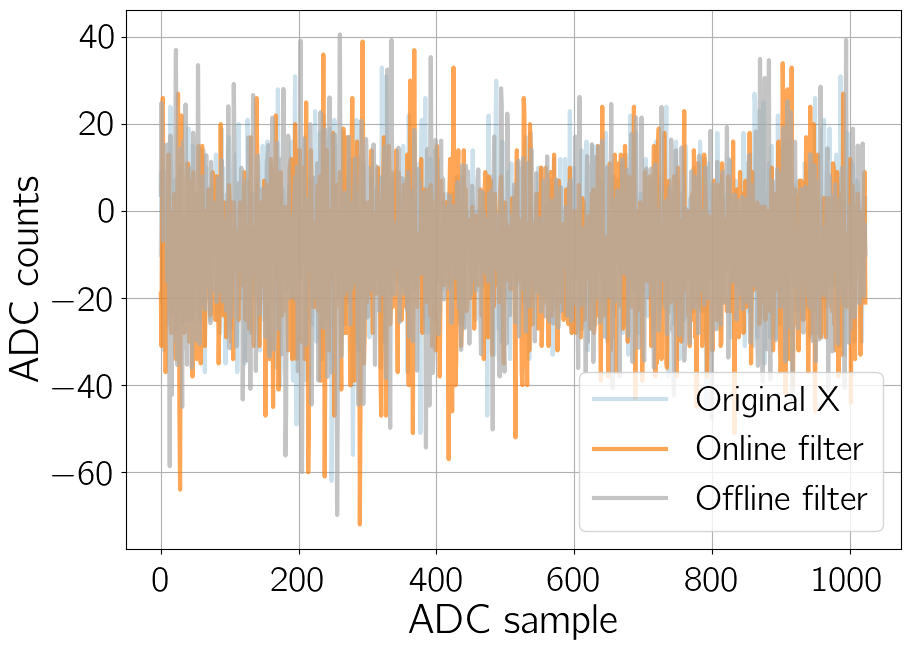

In [17]:
plt.plot(trace[1],label='Original X',alpha=.2)
plt.plot(trace[0],label='Online filter',alpha=.7)
plt.plot(trace_filtered[0,1],label='Offline filter',alpha=.7)
#plt.ylim([-60,60])
plt.xlabel('ADC sample')
plt.ylabel('ADC counts')
plt.legend(frameon=True)
plt.show()

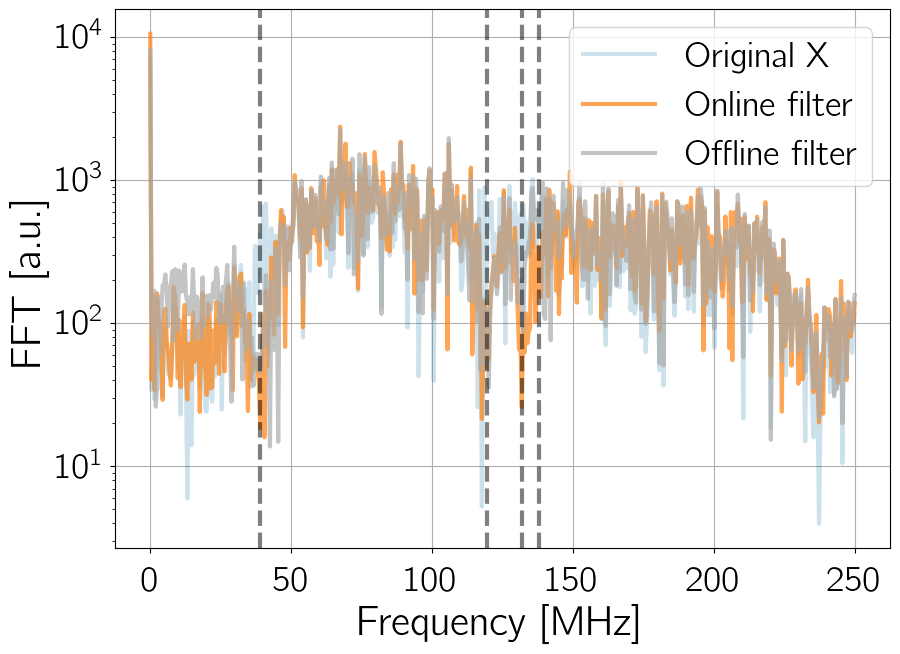

In [15]:
fft          = np.abs( np.fft.rfft(trace) )
fft_filtered = np.abs( np.fft.rfft(trace_filtered) )
freq         = np.fft.rfftfreq( trace.shape[-1] )*500 # [MHz]

plt.plot(freq,fft[1],label='Original X',alpha=.2)
plt.plot(freq,fft[0],label='Online filter',alpha=.7)
plt.plot(freq,fft_filtered[0,1],label='Offline filter',alpha=.7)
plt.axvline(39,ls='--',color='k',alpha=.5)
plt.axvline(119.4,ls='--',color='k',alpha=.5)
plt.axvline(132,ls='--',color='k',alpha=.5)
plt.axvline(137.8,ls='--',color='k',alpha=.5)
plt.yscale('log')
plt.xlabel('Frequency [MHz]')
plt.ylabel('FFT [a.u.]')
plt.legend(frameon=True)
plt.show()

In [ ]:
rms_original = np.sqrt( np.mean( trace[2,100:924]**2 ) )
rms_online = np.sqrt( np.mean( trace_filtered[0,2,100:924]**2 ) )